In [1]:
import numpy as np
import mgym
import matplotlib.pyplot as plt

In [6]:
class Agent:
    def __init__(self, env, dis=0.9):
        self.env = env
        self.dis = dis
        self.value_table = np.zeros(env.observation_space.n)
        self.policy_table = np.ones((env.observation_space.n, env.action_space.n)) * (1.0 / env.action_space.n)
    
    def iterate_value(self, env=None):
        if env == None:
            env = self.env
            
        next_value_table = np.zeros(env.observation_space.n)
        for s in range(env.observation_space.n):
            next_values = np.zeros(env.action_space.n)
            for a in range(env.action_space.n):
                env.reset_state(s)
                policy = self.policy_table[s, a]
                s1, reward, done, _ = env.step(a)
                value_next = self.value_table[s1]
                value = policy * (reward + self.dis * value_next)
                next_values[a] = value
            max_value = np.max(next_values)
            next_value_table[s] = max_value
            
        return next_value_table
    
    def value_iterate(self, env=None, cs=None):
        if env == None:
            env = self.env
            
        next_value_table = self.iterate_value(env)
        self.value_table = next_value_table
        
        if cs is not None:
            cs.append((self.value_table ** 2).sum())
            
    def train(self, num_episode=100, env=None):
        if env == None:
            env = self.env

        cs = []
        for episode in range(num_episode):
            self.value_iterate(env, cs)
            
        return cs

In [7]:
env = mgym.make("5x5")

In [8]:
a = Agent(env)

In [9]:
cs = a.train()

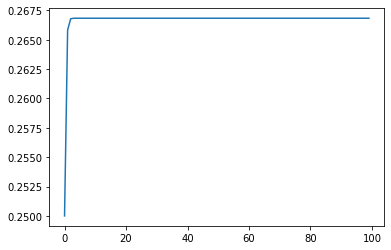

In [10]:
plt.plot(cs)

In [11]:
a.value_table.reshape(5,5)

array([[1.44162598e-04, 6.40722656e-04, 2.84765625e-03, 1.26562500e-02,
        2.84765625e-03],
       [6.40722656e-04, 1.44162598e-04, 2.50000000e-01, 5.62500000e-02,
        1.26562500e-02],
       [2.84765625e-03, 2.50000000e-01, 0.00000000e+00, 2.50000000e-01,
        5.62500000e-02],
       [1.26562500e-02, 5.62500000e-02, 2.50000000e-01, 5.62500000e-02,
        1.26562500e-02],
       [2.84765625e-03, 1.26562500e-02, 5.62500000e-02, 1.26562500e-02,
        2.84765625e-03]])